# Solving Poisson PDE using Finite Elements Method


In the following notebook there is an algorithm that solves Poisson equation using FEM. It starts with activating used packages. Gridap is commonly used package to solve PDE using Finite Elements Method. It is well-made to use some AMR methods in it. I used Plots to visualize the results

In [18]:
using Gridap, Plots

Then, one has to define the problem and solve it with Finite elements method

Firstly, computational domain and initial mesh is defined. Here the square with vertices (-3,-3), (3, -3), (-3, 3), (3, 3) is defined with 50 cells along each direction(x,y).

In [19]:
domain = (-3, 3, -3, 3)
n_cells = (50, 50)  # initial mesh resolution
model = CartesianDiscreteModel(domain, n_cells)

CartesianDiscreteModel()

Secondly, the FE space using Lagrangian elements of order 2 is defined

In [20]:
order = 2
reffe = ReferenceFE(lagrangian, Float64, order)
# Assume homogeneous Dirichlet boundary conditions (u = 0 on the boundary)
V = FESpace(model, reffe; conformity=:H1, dirichlet_tags="boundary")

UnconstrainedFESpace()

Subsequently, one define the right-hand side function

In [21]:
f(x) = 4 * ((x[1]^2 + x[2]^2) - 1) * exp(-x[1]^2 - x[2]^2)

f (generic function with 1 method)

After that, one define the integration measure over the domain. Basically, in this step we define the geometry of our domain. Triangulation means that our domain will be made of triangles(or quadliterals - figure with 4 vertices).

In [22]:
Ω = Triangulation(model)
dΩ = Measure(Ω, 2)

GenericMeasure()

Then the weak(variational) form of the PDE is defined. Since our equation looks like $\Delta$u = f, on have to add -1 before the integral in order to have correct variational form of our PDE

In [23]:
a(u,v) = (-1)*∫( ∇(u) ⋅ ∇(v) )dΩ
l(v) = ∫( f * v )dΩ

l (generic function with 1 method)

Eventually, we assemble and solve the Finite Elements problem

In [24]:
op = AffineFEOperator(a, l, V, V)
uh = solve(op)

SingleFieldFEFunction():
 num_cells: 2500
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 18216742730499721369

Here the analytical solution is defined. It is necessary for calculating error further

In [25]:
u_exact(x) = exp(-x[1]^2 - x[2]^2)

u_exact (generic function with 1 method)

Here we create a range of 50 equally spaced values from (-3, 3) in the x and y direction.
For each 𝑦 in ys and each 𝑥 in xs, a Point(x, y) is generated. The resulting array points contains the coordinates at which the finite element solution and the analytical solution will be evaluated.

In [26]:
n = 50
xs = range(-3, 3, length=n)
ys = range(-3, 3, length=n)
points = [Point(x, y) for y in ys, x in xs]

50×50 Matrix{VectorValue{2, Float64}}:
     VectorValue{2, Float64}(-3.0, -3.0)      VectorValue{2, Float64}(-2.87755, -3.0)  …      VectorValue{2, Float64}(3.0, -3.0)
 VectorValue{2, Float64}(-3.0, -2.87755)  VectorValue{2, Float64}(-2.87755, -2.87755)     VectorValue{2, Float64}(3.0, -2.87755)
  VectorValue{2, Float64}(-3.0, -2.7551)   VectorValue{2, Float64}(-2.87755, -2.7551)      VectorValue{2, Float64}(3.0, -2.7551)
 VectorValue{2, Float64}(-3.0, -2.63265)  VectorValue{2, Float64}(-2.87755, -2.63265)     VectorValue{2, Float64}(3.0, -2.63265)
  VectorValue{2, Float64}(-3.0, -2.5102)   VectorValue{2, Float64}(-2.87755, -2.5102)      VectorValue{2, Float64}(3.0, -2.5102)
 VectorValue{2, Float64}(-3.0, -2.38776)  VectorValue{2, Float64}(-2.87755, -2.38776)  …  VectorValue{2, Float64}(3.0, -2.38776)
 VectorValue{2, Float64}(-3.0, -2.26531)  VectorValue{2, Float64}(-2.87755, -2.26531)     VectorValue{2, Float64}(3.0, -2.26531)
 VectorValue{2, Float64}(-3.0, -2.14286)  VectorValue{2, F

In [27]:
# Evaluate the FE solution and the analytical solution at the grid points.
uh_values = [uh(p) for p in points]
u_exact_values = [u_exact(p) for p in points]

50×50 Matrix{Float64}:
 1.523e-8    3.12796e-8  6.23447e-8  …  6.23447e-8  3.12796e-8  1.523e-8
 3.12796e-8  6.42426e-8  1.28045e-7     1.28045e-7  6.42426e-8  3.12796e-8
 6.23447e-8  1.28045e-7  2.55211e-7     2.55211e-7  1.28045e-7  6.23447e-8
 1.20591e-7  2.47672e-7  4.93645e-7     4.93645e-7  2.47672e-7  1.20591e-7
 2.26363e-7  4.64909e-7  9.2663e-7      9.2663e-7   4.64909e-7  2.26363e-7
 4.12358e-7  8.46908e-7  1.68801e-6  …  1.68801e-6  8.46908e-7  4.12358e-7
 7.28986e-7  1.4972e-6   2.98414e-6     2.98414e-6  1.4972e-6   7.28986e-7
 1.25066e-6  2.56863e-6  5.11965e-6     5.11965e-6  2.56863e-6  1.25066e-6
 2.08228e-6  4.27661e-6  8.5239e-6      8.5239e-6   4.27661e-6  2.08228e-6
 3.36444e-6  6.90994e-6  1.37725e-5     1.37725e-5  6.90994e-6  3.36444e-6
 5.2755e-6   1.08349e-5  2.15955e-5  …  2.15955e-5  1.08349e-5  5.2755e-6
 8.02771e-6  1.64874e-5  3.28618e-5     3.28618e-5  1.64874e-5  8.02771e-6
 1.18548e-5  2.43477e-5  4.85284e-5     4.85284e-5  2.43477e-5  1.18548e-5
 ⋮   

In [28]:
# Reshape the solutions into matrices for plotting.
uh_matrix = reshape(uh_values, (n, n))
u_exact_matrix = reshape(u_exact_values, (n, n))

50×50 Matrix{Float64}:
 1.523e-8    3.12796e-8  6.23447e-8  …  6.23447e-8  3.12796e-8  1.523e-8
 3.12796e-8  6.42426e-8  1.28045e-7     1.28045e-7  6.42426e-8  3.12796e-8
 6.23447e-8  1.28045e-7  2.55211e-7     2.55211e-7  1.28045e-7  6.23447e-8
 1.20591e-7  2.47672e-7  4.93645e-7     4.93645e-7  2.47672e-7  1.20591e-7
 2.26363e-7  4.64909e-7  9.2663e-7      9.2663e-7   4.64909e-7  2.26363e-7
 4.12358e-7  8.46908e-7  1.68801e-6  …  1.68801e-6  8.46908e-7  4.12358e-7
 7.28986e-7  1.4972e-6   2.98414e-6     2.98414e-6  1.4972e-6   7.28986e-7
 1.25066e-6  2.56863e-6  5.11965e-6     5.11965e-6  2.56863e-6  1.25066e-6
 2.08228e-6  4.27661e-6  8.5239e-6      8.5239e-6   4.27661e-6  2.08228e-6
 3.36444e-6  6.90994e-6  1.37725e-5     1.37725e-5  6.90994e-6  3.36444e-6
 5.2755e-6   1.08349e-5  2.15955e-5  …  2.15955e-5  1.08349e-5  5.2755e-6
 8.02771e-6  1.64874e-5  3.28618e-5     3.28618e-5  1.64874e-5  8.02771e-6
 1.18548e-5  2.43477e-5  4.85284e-5     4.85284e-5  2.43477e-5  1.18548e-5
 ⋮   

In [29]:
# Compute the error matrix (absolute difference)
error_matrix = abs.(uh_matrix .- u_exact_matrix)

50×50 Matrix{Float64}:
 1.523e-8    3.12796e-8  6.23447e-8  …  6.23447e-8  3.12796e-8  1.523e-8
 3.12796e-8  5.90492e-7  1.14992e-6     1.14992e-6  5.90492e-7  3.12796e-8
 6.23447e-8  1.14992e-6  2.22079e-6     2.22079e-6  1.14992e-6  6.23447e-8
 1.20591e-7  1.72759e-6  3.29266e-6     3.29266e-6  1.72759e-6  1.20591e-7
 2.26363e-7  2.34948e-6  4.39341e-6     4.39341e-6  2.34948e-6  2.26363e-7
 4.12358e-7  3.05372e-6  5.56298e-6  …  5.56298e-6  3.05372e-6  4.12358e-7
 7.28986e-7  3.89427e-6  6.85521e-6     6.85521e-6  3.89427e-6  7.28986e-7
 1.25066e-6  4.94452e-6  8.33928e-6     8.33928e-6  4.94452e-6  1.25066e-6
 2.08228e-6  6.30043e-6  1.01005e-5     1.01005e-5  6.30043e-6  2.08228e-6
 3.36444e-6  8.08209e-6  1.22397e-5     1.22397e-5  8.08209e-6  3.36444e-6
 5.2755e-6   1.04324e-5  1.487e-5    …  1.487e-5    1.04324e-5  5.2755e-6
 8.02771e-6  1.35114e-5  1.81109e-5     1.81109e-5  1.35114e-5  8.02771e-6
 1.18548e-5  1.74841e-5  2.20779e-5     2.20779e-5  1.74841e-5  1.18548e-5
 ⋮   

In [30]:
# 1) Set a dark theme for the background and axes
theme(:dark)

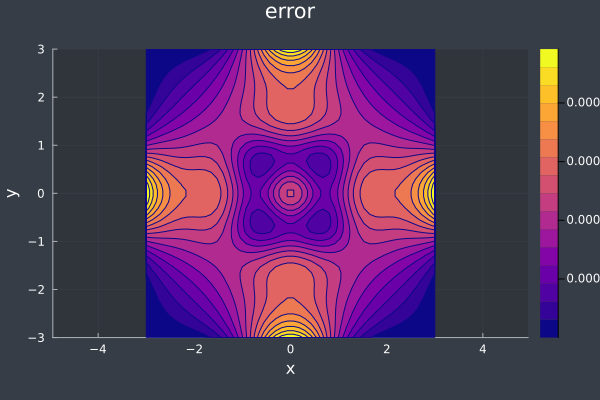

In [31]:
# 2) Create contour plots with filled contours and a nice colormap
p1 = contour(xs, ys, u_exact_matrix;
    fill       = true,
    c          = :plasma,     # or :inferno, :viridis, etc.
    colorbar   = true,
    title      = "analytic",
    xlabel     = "x",
    ylabel     = "y",
    aspect_ratio = :equal,
    levels     = 15,          # number of contour levels
)

p2 = contour(xs, ys, uh_matrix;
    fill       = true,
    c          = :plasma,
    colorbar   = true,
    title      = "predict",
    xlabel     = "x",
    ylabel     = "y",
    aspect_ratio = :equal,
    levels     = 15,
)

p3 = contour(xs, ys, error_matrix;
    fill       = true,
    c          = :plasma,
    colorbar   = true,
    title      = "error",
    xlabel     = "x",
    ylabel     = "y",
    aspect_ratio = :equal,
    levels     = 15,
)

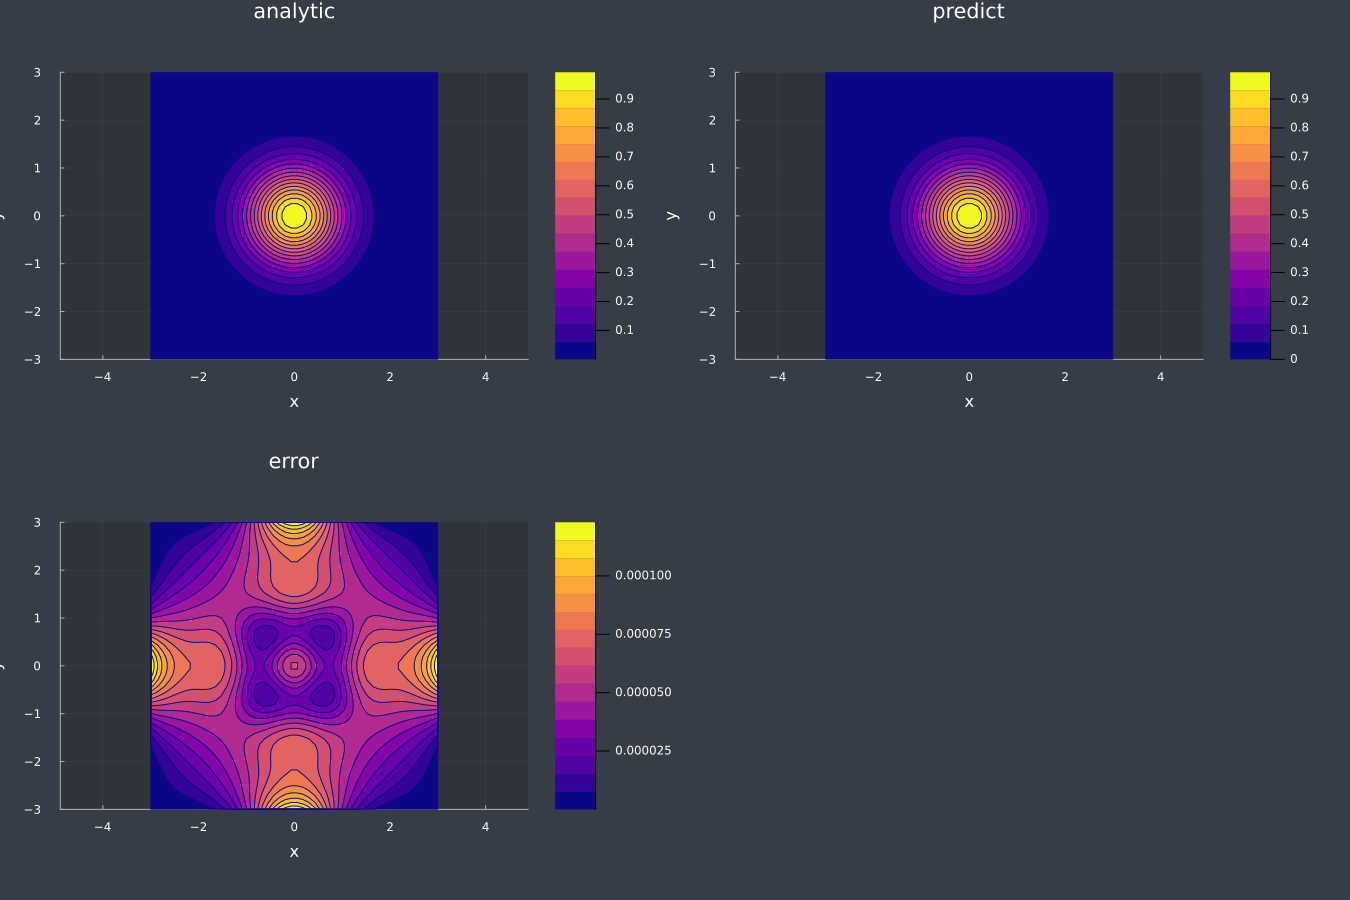

In [32]:
# 3) Combine the three plots in a 2×2 grid (with one empty slot)
plot(p1, p2, p3, layout = (2, 2), size = (1350, 900))
